In [29]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cleaned_air.csv")

In [3]:
df.head()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,30,1410000
1,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,125,17787978
2,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,30,16620000
3,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,3,491700
4,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,16,7301712


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22045 entries, 0 to 22044
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Operating Airline            22045 non-null  object
 1   Operating Airline IATA Code  22045 non-null  object
 2   Published Airline            22045 non-null  object
 3   Published Airline IATA Code  22045 non-null  object
 4   GEO Summary                  22045 non-null  object
 5   GEO Region                   22045 non-null  object
 6   Landing Aircraft Type        22045 non-null  object
 7   Aircraft Body Type           22045 non-null  object
 8   Aircraft Manufacturer        22045 non-null  object
 9   Aircraft Model               22045 non-null  object
 10  Landing Count                22045 non-null  int64 
 11  Total Landed Weight          22045 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.0+ MB
None


In [8]:
print(df.describe())

       Landing Count  Total Landed Weight
count   22045.000000         2.204500e+04
mean      113.392425         1.899138e+07
std       249.636873         3.033287e+07
min         1.000000         6.850000e+03
25%        14.000000         3.035292e+06
50%        31.000000         9.660000e+06
75%        83.000000         1.953000e+07
max      2245.000000         2.730420e+08


In [4]:
df.shape

(22045, 12)

In [44]:
df[df.dtypes[df.dtypes == 'int64'].index]

,Landing Count,Total Landed Weight,New Column
0,30,1410000,42300000
1,125,17787978,2223497250
2,30,16620000,498600000
3,3,491700,1475100
4,16,7301712,116827392
...,...,...,...
22040,155,7285000,1129175000
22041,268,17956000,4812208000
22042,62,4154000,257548000
22043,1360,63920000,86931200000


In [46]:
pd.Categorical(df["Aircraft Body Type"])

['Regional Jet', 'Narrow Body', 'Wide Body', 'Narrow Body', 'Wide Body', ..., 'Regional Jet', 'Regional Jet', 'Regional Jet', 'Regional Jet', 'Turbo Prop']
Length: 22045
Categories (4, object): ['Narrow Body', 'Regional Jet', 'Turbo Prop', 'Wide Body']

In [47]:
df[df['Landing Count'] == max(df['Landing Count'])]['Operating Airline']

18708    SkyWest Airlines
Name: Operating Airline, dtype: object

In [51]:
df[(df['GEO Region'] == 'Asia')  & (df['Landing Count'] > 180 )]

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight,New Column,Weight Category
7517,United Airlines,UA,United Airlines,UA,International,Asia,Passenger,Wide Body,Boeing,747,185,116550000,21561750000,Heavy
7641,United Airlines,UA,United Airlines,UA,International,Asia,Passenger,Wide Body,Boeing,747,183,115290000,21098070000,Heavy
7929,United Airlines,UA,United Airlines,UA,International,Asia,Passenger,Wide Body,Boeing,747,185,116550000,21561750000,Heavy
7964,United Airlines,UA,United Airlines,UA,International,Asia,Passenger,Wide Body,Boeing,747,181,114030000,20639430000,Heavy
9529,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Asia,Passenger,Wide Body,Boeing,747,186,117180000,21795480000,Heavy


In [52]:
df.loc[0:10,['Operating Airline','GEO Region','Weight Category']]

,Operating Airline,GEO Region,Weight Category
0,SkyWest Airlines,Canada,Light
1,Air Canada,Canada,Light
2,Japan Airlines,Asia,Light
3,"COPA Airlines, Inc.",Central America,Light
4,Hong Kong Airlines Limited,Asia,Light
5,Finnair,Europe,Light
6,WOW Air,Europe,Light
7,United Airlines,Canada,Light
8,Southwest Airlines,US,Light
9,Singapore Airlines,Asia,Light


In [5]:
type(df)

pandas.core.frame.DataFrame

In [26]:
print(df.isnull().sum())

Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Landing Aircraft Type          0
Aircraft Body Type             0
Aircraft Manufacturer          0
Aircraft Model                 0
Landing Count                  0
Total Landed Weight            0
dtype: int64


In [6]:
df.dtypes

Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Landing Aircraft Type          object
Aircraft Body Type             object
Aircraft Manufacturer          object
Aircraft Model                 object
Landing Count                   int64
Total Landed Weight             int64
dtype: object

In [10]:
print(df['Operating Airline'])

0                  SkyWest Airlines
1                        Air Canada
2                    Japan Airlines
3               COPA Airlines, Inc.
4        Hong Kong Airlines Limited
                    ...            
22040              SkyWest Airlines
22041              SkyWest Airlines
22042              SkyWest Airlines
22043              SkyWest Airlines
22044              SkyWest Airlines
Name: Operating Airline, Length: 22045, dtype: object


In [11]:
print(df['Operating Airline'].unique())

['SkyWest Airlines' 'Air Canada' 'Japan Airlines' 'COPA Airlines, Inc.'
 'Hong Kong Airlines Limited' 'Finnair' 'WOW Air' 'United Airlines'
 'Southwest Airlines' 'Singapore Airlines' 'Delta Air Lines'
 'Compass Airlines' 'Emirates' 'American Airlines' 'Air France'
 'Volaris Airlines' 'Korean Air Lines' 'Virgin Atlantic'
 'Frontier Airlines' 'Sun Country Airlines' 'Atlas Air, Inc'
 'China Southern' 'Air Pacific Limited dba Fiji Airways' 'Jazz Aviation'
 'Swissport USA' 'China Eastern' 'Air New Zealand' 'Qantas Airways'
 'Aeromexico' 'TACA' 'EVA Airways' 'Turkish Airlines'
 'Lufthansa German Airlines' 'Air India Limited' 'China Airlines'
 'Icelandair EHF' 'Cathay Pacific' 'Aer Lingus' 'Iberia'
 'Thomas Cook Airlines' 'Hawaiian Airlines' 'Philippine Airlines'
 'Alaska Airlines' 'Redding Aero Enterprises' 'French Bee'
 'JetBlue Airways' 'XL Airways France' 'KLM Royal Dutch Airlines'
 'Air China' 'Horizon Air' 'All Nippon Airways' 'British Airways'
 'SAS Airlines' 'WestJet Airlines' 'Asiana

In [12]:
unique_airlines = df['Operating Airline'].drop_duplicates().reset_index()
print(unique_airlines)

     index           Operating Airline
0        0            SkyWest Airlines
1        1                  Air Canada
2        2              Japan Airlines
3        3         COPA Airlines, Inc.
4        4  Hong Kong Airlines Limited
..     ...                         ...
102  20014                  Icelandair
103  20083             Air Canada Jazz
104  20275                Xtra Airways
105  21388            Independence Air
106  21864              Boeing Company

[107 rows x 2 columns]


In [13]:
print(df['GEO Region'].unique())

['Canada' 'Asia' 'Central America' 'Europe' 'US' 'Mexico'
 'Australia / Oceania' 'Middle East' 'Caribbean' 'South America']


In [14]:

print(df['Aircraft Model'].value_counts())

Aircraft Model
737          3134
747          3004
A320         1919
777          1763
A319         1526
             ... 
IL-62           1
MD-87           1
C402            1
DC-3            1
CHIEFTAIN       1
Name: count, Length: 89, dtype: int64


In [16]:
print(df['Aircraft Manufacturer'].value_counts())

Aircraft Manufacturer
Boeing               13261
Airbus                5666
Bombardier            1165
McDonnell Douglas      853
Embraer                686
Beechcraft             164
Shorts                  70
Fairchild               59
DeHavilland             41
Cessna                  29
LearJet                 18
Swearingen              13
Piper                    9
BAE-Avro                 6
Lockheed                 5
Name: count, dtype: int64


In [17]:
print(df['GEO Region'].value_counts())

GEO Region
US                     10840
Asia                    4082
Europe                  2334
Canada                  2028
Mexico                  1572
Australia / Oceania      647
Central America          326
Middle East              163
South America             50
Caribbean                  3
Name: count, dtype: int64


In [15]:
grouped_data = df.groupby('Operating Airline')['Landing Count'].sum()
print(grouped_data)

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet     173
ABX Air                                     6621
ASTAR USA, LLC                               142
ATA Airlines                                1396
Aer Lingus                                  1883
                                            ... 
WOW Air                                      604
WestJet Airlines                            3681
World Airways                                192
XL Airways France                            238
Xtra Airways                                   1
Name: Landing Count, Length: 107, dtype: int64


In [25]:
filtered_data = df[df['Total Landed Weight'] > 250000000]
print(filtered_data)

                      Operating Airline Operating Airline IATA Code  \
10812  United Airlines - Pre 07/01/2013                          UA   
11361  United Airlines - Pre 07/01/2013                          UA   
11993  United Airlines - Pre 07/01/2013                          UA   
12349  United Airlines - Pre 07/01/2013                          UA   
12397  United Airlines - Pre 07/01/2013                          UA   
12514  United Airlines - Pre 07/01/2013                          UA   
12660  United Airlines - Pre 07/01/2013                          UA   
13412  United Airlines - Pre 07/01/2013                          UA   
13526  United Airlines - Pre 07/01/2013                          UA   
13599  United Airlines - Pre 07/01/2013                          UA   
19421  United Airlines - Pre 07/01/2013                          UA   
20288  United Airlines - Pre 07/01/2013                          UA   
20438  United Airlines - Pre 07/01/2013                          UA   
20632 

<Axes: ylabel='Frequency'>

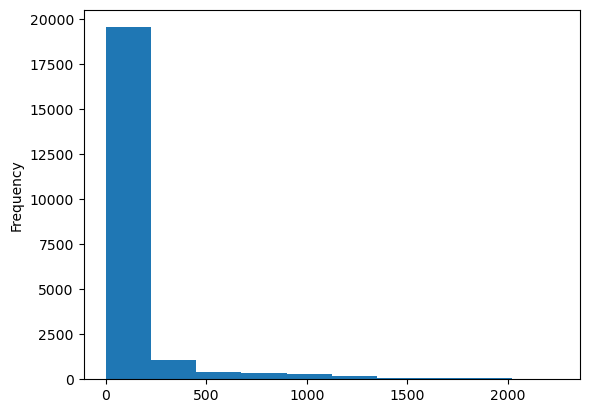

In [31]:
df['Landing Count'].plot.hist()

<Axes: xlabel='Operating Airline IATA Code'>

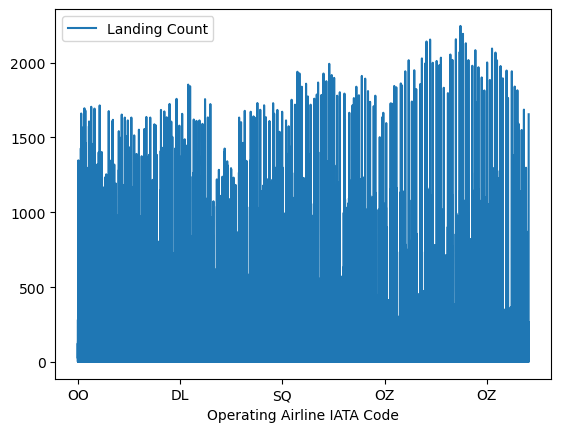

In [34]:
df.plot(x='Operating Airline IATA Code', y='Landing Count', kind='line')

<Axes: xlabel='GEO Region'>

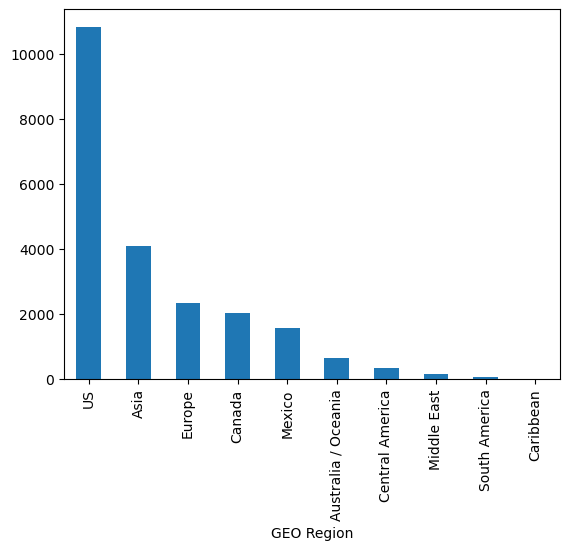

In [35]:
df['GEO Region'].value_counts().plot(kind='bar')

<Axes: xlabel='Total Landed Weight', ylabel='Landing Count'>

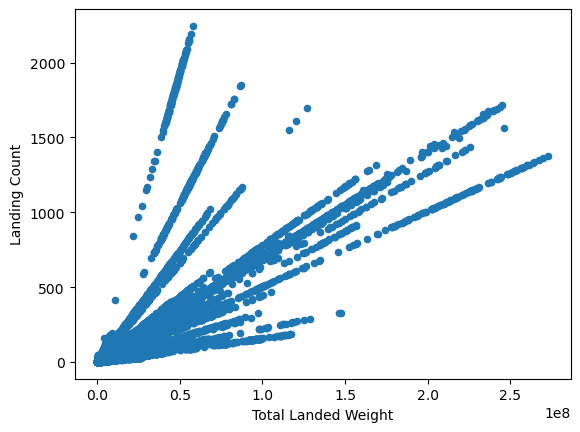

In [36]:
df.plot.scatter(x='Total Landed Weight', y='Landing Count')

In [37]:
df['New Column'] = df['Landing Count'] * df['Total Landed Weight']

In [38]:
df.head()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight,New Column
0,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,30,1410000,42300000
1,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,125,17787978,2223497250
2,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,30,16620000,498600000
3,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,3,491700,1475100
4,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,16,7301712,116827392


In [41]:
def weight_category(weight):
    if weight > 100000000:
        return 'Heavy'
    else:
        return 'Light'

df['Weight Category'] = df['Total Landed Weight'].apply(weight_category)

In [42]:
df.head()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight,New Column,Weight Category
0,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,30,1410000,42300000,Light
1,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,125,17787978,2223497250,Light
2,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,30,16620000,498600000,Light
3,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,3,491700,1475100,Light
4,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,16,7301712,116827392,Light


In [43]:
mean_count = df['Landing Count'].mean()
print(mean_count)

113.39242458607394
